In [154]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import dython as dt
import numpy as np

In [16]:
df = pd.read_csv ('list_attr_celeba.txt', sep='\s+')

In [18]:
df['five_o_Clock_Shadow'] = df['5_o_Clock_Shadow']

In [21]:
df.drop('5_o_Clock_Shadow', axis=1, inplace=True)

In [56]:
rows_total = df['Arched_Eyebrows'].count()

202599

In [22]:
df.describe()

,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,five_o_Clock_Shadow
count,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,...,202599.000000,202599.000000,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000
mean,-0.466039,0.02501,-0.590857,-0.955113,-0.696849,-0.518408,-0.530935,-0.521498,-0.704016,-0.898203,...,-0.035839,-0.583196,-0.360866,-0.62215,-0.903079,-0.055129,-0.754066,-0.854570,0.547234,-0.777728
std,0.884766,0.99969,0.806778,0.296241,0.717219,0.855135,0.847414,0.853255,0.710186,0.439582,...,0.999360,0.812333,0.932620,0.78290,0.429475,0.998482,0.656800,0.519338,0.836982,0.628602
min,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000
50%,-1.000000,1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000
75%,1.000000,1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,-1.000000,1.000000,-1.00000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
#df.hist(column="5_o_Clock_Shadow")

/Users/petrklepetko/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


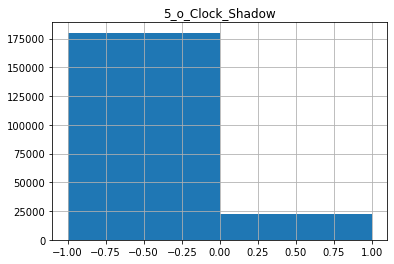

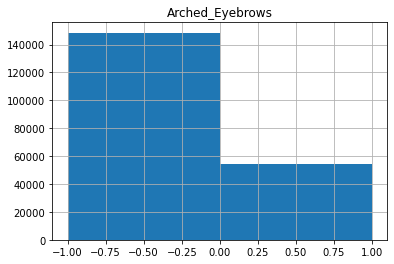

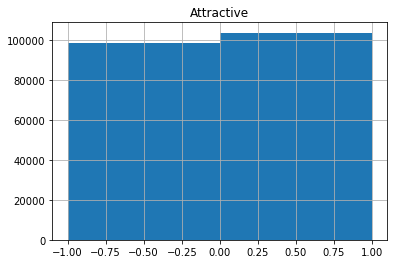

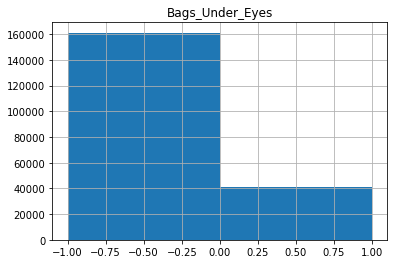

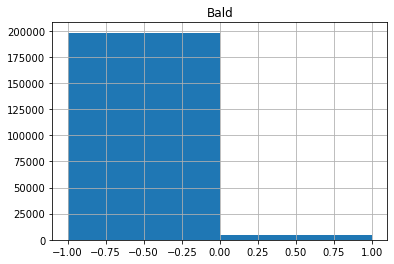

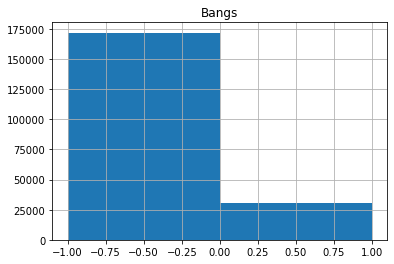

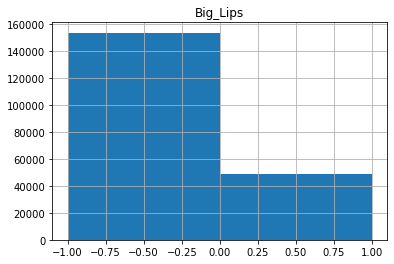

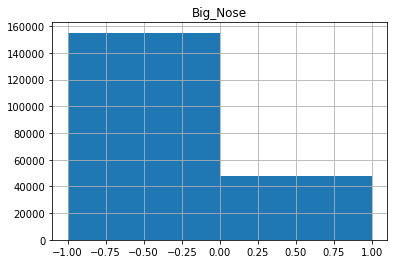

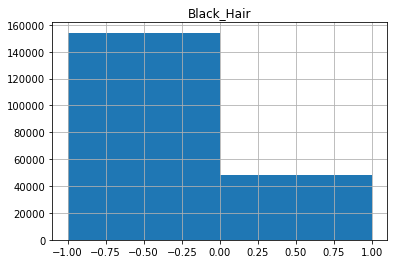

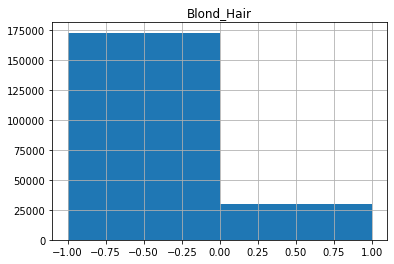

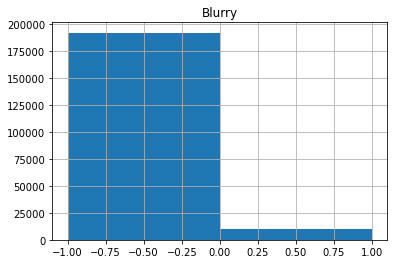

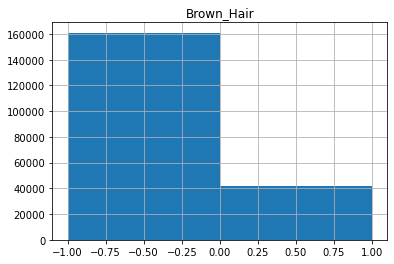

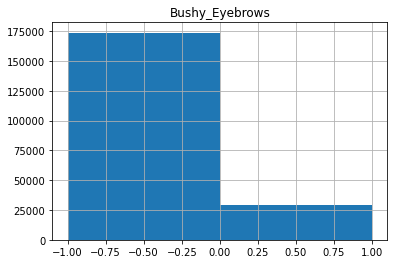

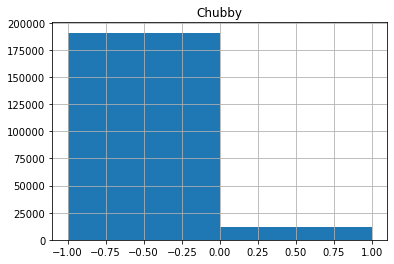

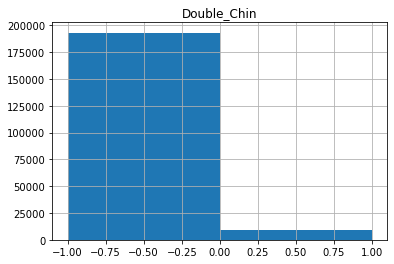

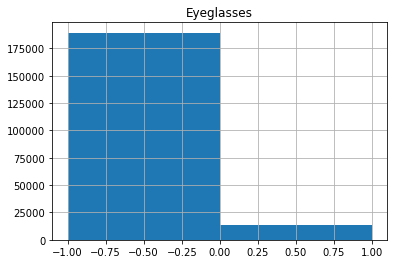

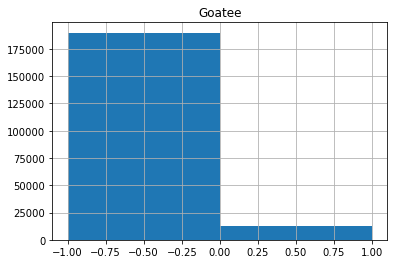

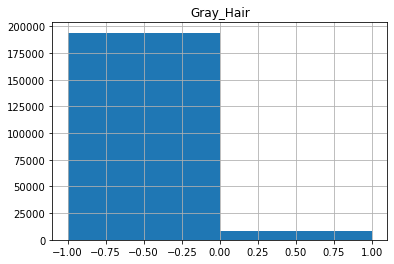

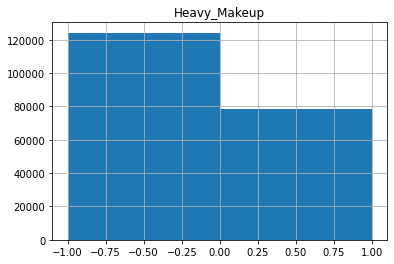

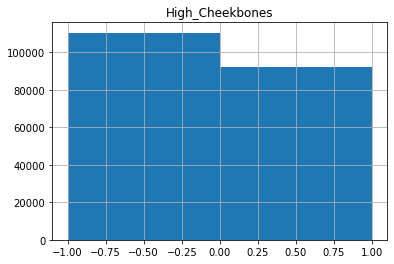

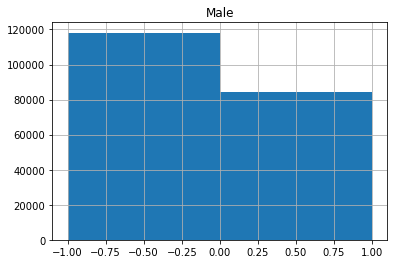

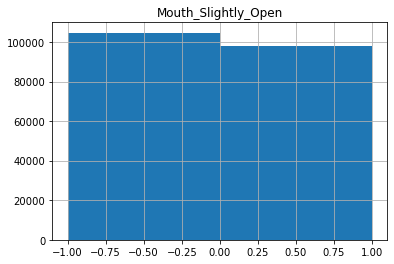

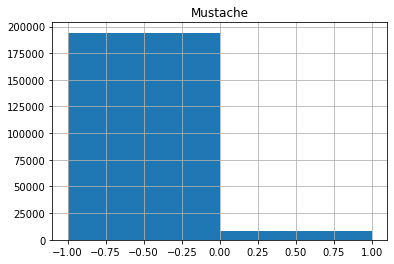

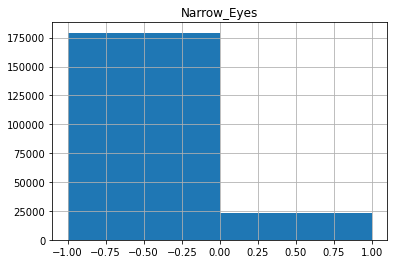

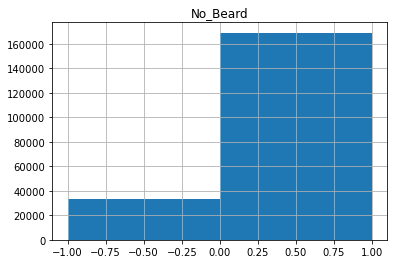

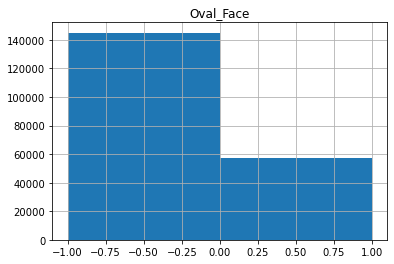

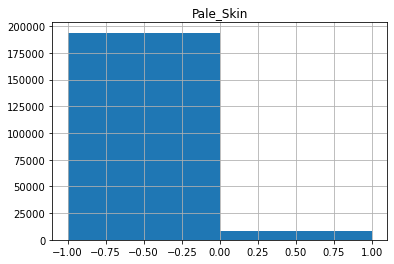

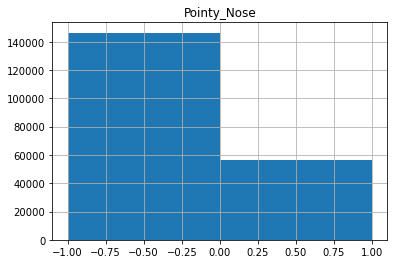

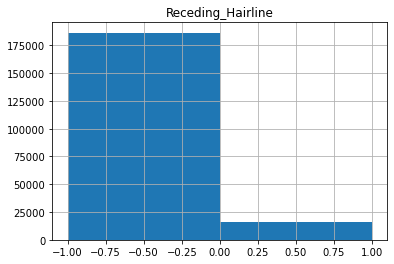

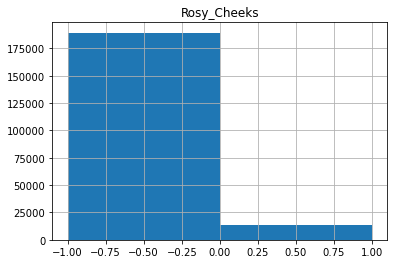

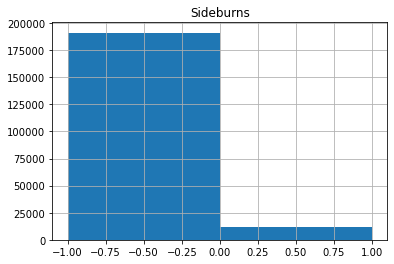

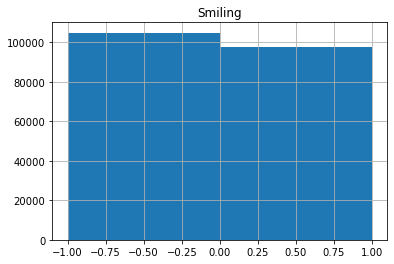

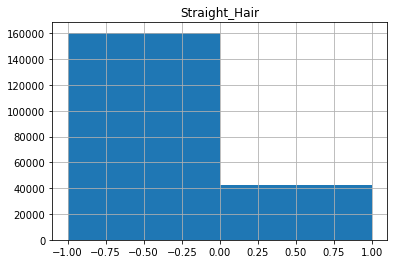

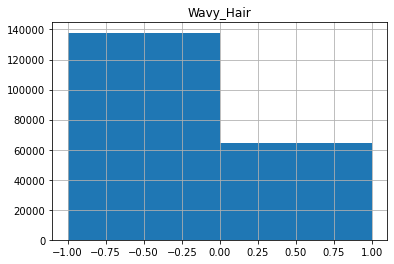

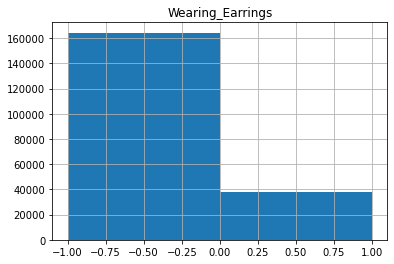

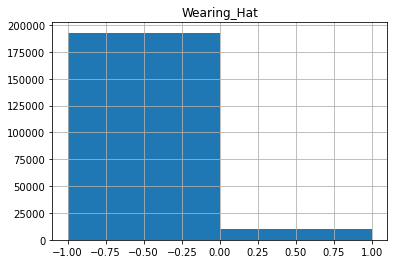

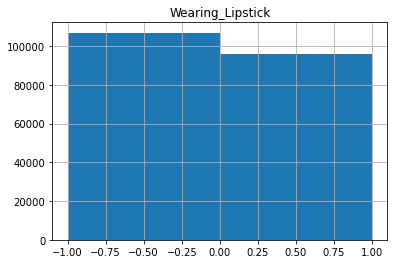

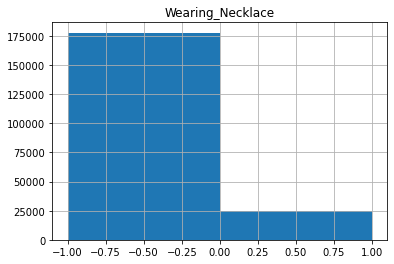

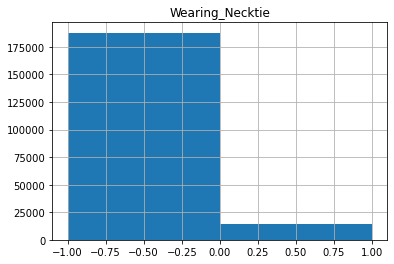

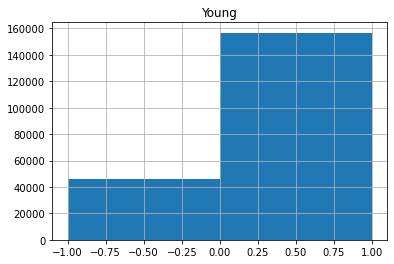

In [30]:
columns = df.columns[1:]
for column in columns:
    #print(column)
    df.hist(column=column, bins=2)

In [60]:
#df[df.Arched_Eyebrows == 1]['Arched_Eyebrows'].count()

In [77]:
result = {}
for column in df.columns[1:]:
    count = df[df[column] == 1][column].count()
    result[column] = count

In [100]:
result_df = pd.DataFrame(data=[result.keys(), result.values()], index=['column', 'count'])
result_df = result_df.transpose()
result_df['count'] = result_df['count'] / rows_total
result_df.sort_values(by='count', inplace=True)

result_df

,column,count
3,Bald,0.022443
21,Mustache,0.041545
16,Gray_Hair,0.04195
25,Pale_Skin,0.042947
13,Double_Chin,0.046688
34,Wearing_Hat,0.04846
9,Blurry,0.050899
29,Sideburns,0.056511
12,Chubby,0.057567
15,Goatee,0.062764


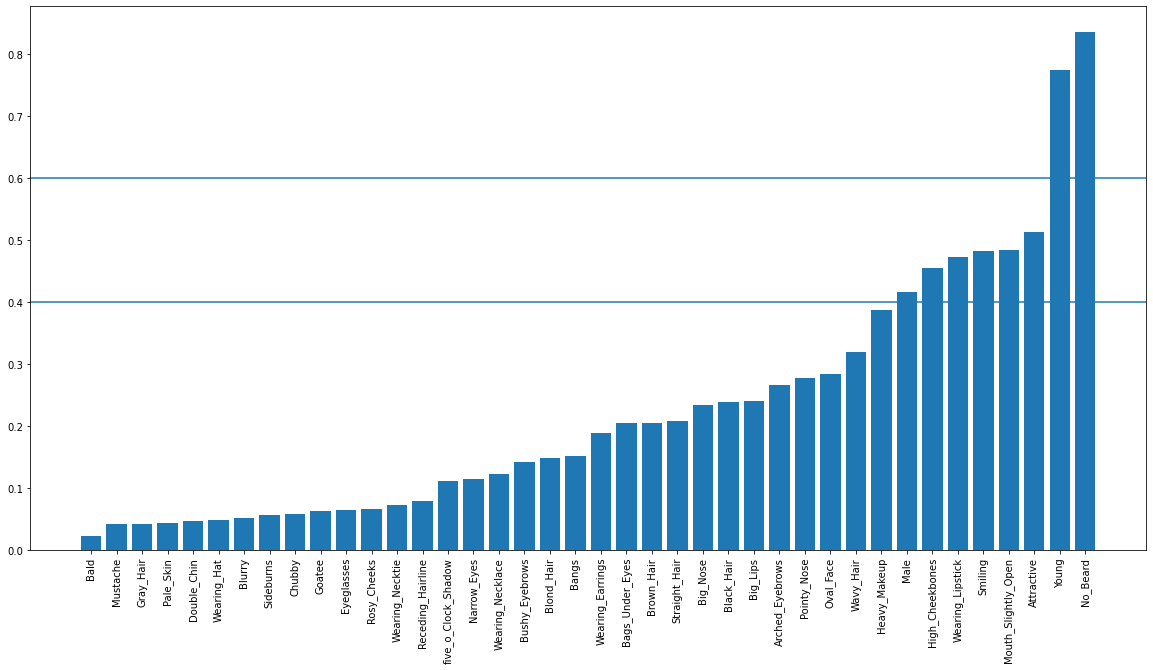

In [144]:
plt.bar(x = result_df['column'], height = result_df['count'], width=0.8)
plt.axhline(0.4)
plt.axhline(0.6)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [149]:
corr_df = df.corr(method = "pearson").round(2)
corr_df

,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,five_o_Clock_Shadow
Arched_Eyebrows,1.00,0.25,-0.09,-0.07,-0.03,0.24,-0.08,-0.00,0.13,-0.08,...,0.09,-0.05,0.20,0.29,-0.10,0.46,0.22,-0.13,0.15,-0.16
Attractive,0.25,1.00,-0.18,-0.15,0.06,0.06,-0.28,0.00,0.15,-0.18,...,0.15,0.04,0.21,0.12,-0.14,0.48,0.07,-0.16,0.39,-0.06
Bags_Under_Eyes,-0.09,-0.18,1.00,0.12,-0.06,-0.01,0.36,0.00,-0.11,-0.03,...,0.11,0.02,-0.13,-0.10,-0.01,-0.28,-0.05,0.20,-0.23,0.17
Bald,-0.07,-0.15,0.12,1.00,-0.06,-0.00,0.18,-0.08,-0.06,-0.01,...,0.01,-0.07,-0.10,-0.06,-0.03,-0.14,-0.05,0.18,-0.20,0.01
Bangs,-0.03,0.06,-0.06,-0.06,1.00,0.03,-0.07,-0.03,0.10,-0.01,...,0.05,0.02,0.07,0.06,-0.08,0.16,0.11,-0.09,0.02,-0.09
Big_Lips,0.24,0.06,-0.01,-0.00,0.03,1.00,0.08,0.07,0.02,-0.04,...,0.01,-0.04,0.12,0.13,-0.01,0.20,0.15,-0.07,0.11,-0.04
Big_Nose,-0.08,-0.28,0.36,0.18,-0.07,0.08,1.00,0.08,-0.16,-0.04,...,0.10,-0.03,-0.13,-0.06,0.07,-0.30,-0.04,0.21,-0.28,0.15
Black_Hair,-0.00,0.00,0.00,-0.08,-0.03,0.07,0.08,1.00,-0.23,-0.04,...,-0.00,0.11,-0.09,0.00,-0.10,-0.07,-0.04,0.02,0.12,0.10
Blond_Hair,0.13,0.15,-0.11,-0.06,0.10,0.02,-0.16,-0.23,1.00,-0.01,...,0.09,0.01,0.13,0.10,-0.08,0.28,0.14,-0.11,0.05,-0.13
Blurry,-0.08,-0.18,-0.03,-0.01,-0.01,-0.04,-0.04,-0.04,-0.01,1.00,...,-0.05,-0.04,-0.02,-0.06,0.02,-0.13,-0.00,-0.01,-0.07,-0.03


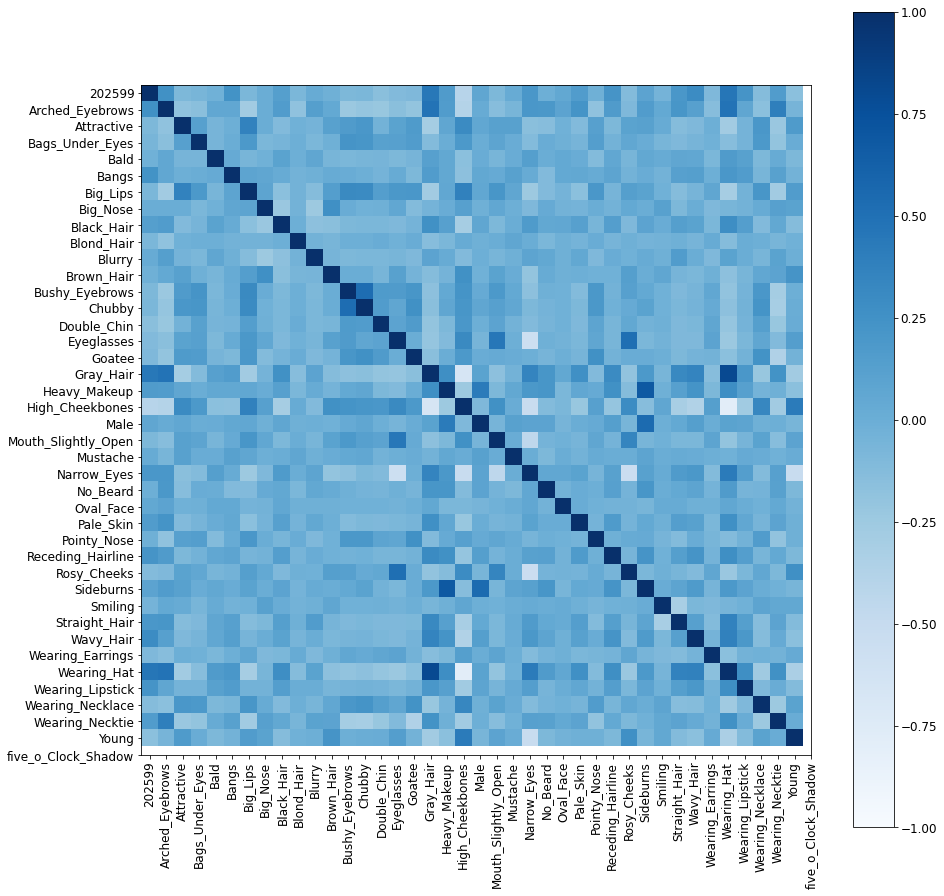

In [158]:
# Step 1: Initiating a fig and axis object
fig, ax = plt.subplots(figsize = (15, 15))
# Step 2: Create a plot
cax = ax.imshow(corr_df.values, interpolation='nearest', cmap = 'Blues', vmin = -1, vmax = 1)
# Step 3: Set axis tick labels 
ax.set_xticks(ticks = range(len(df.columns)),
              labels = df.columns)
ax.set_yticks(ticks = range(len(df.columns)),
              labels = df.columns)
# Step 4: Resize the tick parameters
ax.tick_params(axis = "x", labelsize = 12, labelrotation = 90)
ax.tick_params(axis = "y", labelsize = 12, labelrotation = 0)
# Step 5: Adding a color bar
fig.colorbar(cax).ax.tick_params(labelsize = 12)
# Step 6: Add annotation
